In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
df = pd.read_csv("./train.csv")
print(df.head())

   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   67    Private  366425     Doctorate               16            Divorced   
1   17    Private  244602          12th                8       Never-married   
2   31    Private  174201     Bachelors               13  Married-civ-spouse   
3   58  State-gov  110199       7th-8th                4  Married-civ-spouse   
4   25  State-gov  149248  Some-college               10       Never-married   

         occupation   relationship   race gender  capital-gain  capital-loss  \
0   Exec-managerial  Not-in-family  White   Male         99999             0   
1     Other-service      Own-child  White   Male             0             0   
2   Exec-managerial        Husband  White   Male             0             0   
3  Transport-moving        Husband  White   Male             0             0   
4     Other-service  Not-in-family  Black   Male             0             0   

   hours-per-week native-country  inco

# What we want to know 

- income of maried people vs non maried
- same but per age
- hours per week of male and females

In [16]:
#Spliting data male vs female...
df["fnlwgt"] = df["fnlwgt"]*12/100 # make it $/year
male = df[df["gender"] == "Male"]
female = df[df["gender"] == "Female"]

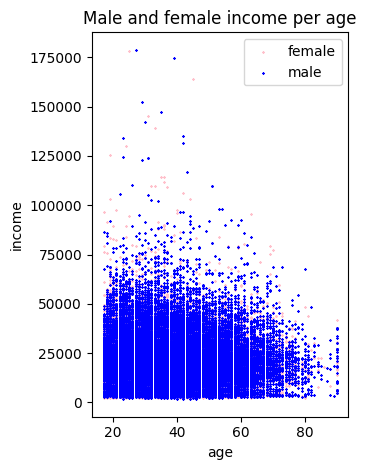

In [18]:
plt.subplot(1,2,1)
plt.scatter(female["age"], female["fnlwgt"], color="pink", label="female", s=1, marker="x")
plt.scatter(male["age"], male["fnlwgt"], color="blue", label="male", s=1, marker="x")
plt.xlabel("age")
plt.ylabel("income")
plt.title("Male and female income per age")
plt.legend()
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_10256\1898594572.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male['income_quartile'] = pd.qcut(male['fnlwgt'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
C:\Users\PC\AppData\Local\Temp\ipykernel_10256\1898594572.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quartile_mean = male.groupby('income_quartile')['fnlwgt'].mean()


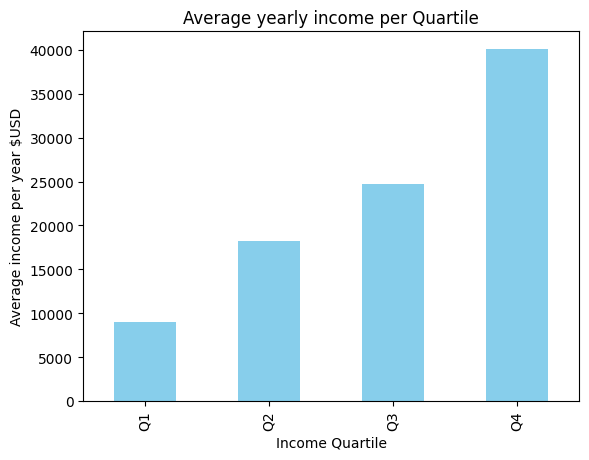

income_quartile
Q1     9006.711347
Q2    18182.688973
Q3    24740.951242
Q4    40119.094612
Name: fnlwgt, dtype: float64


In [20]:
# Divide 'fnlwgt' into 4 quartiles
male['income_quartile'] = pd.qcut(male['fnlwgt'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Calculate the mean fnlwgt for each quartile
quartile_mean = male.groupby('income_quartile')['fnlwgt'].mean()

# Plot the mean fnlwgt for each quartile
quartile_mean.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Income Quartile')
plt.ylabel('Average income per year $USD')
plt.title('Average yearly income per Quartile')

# Show the plot
plt.show()

# Print the mean fnlwgt for each quartile
print(quartile_mean)

# What are the best earners doing for work ?

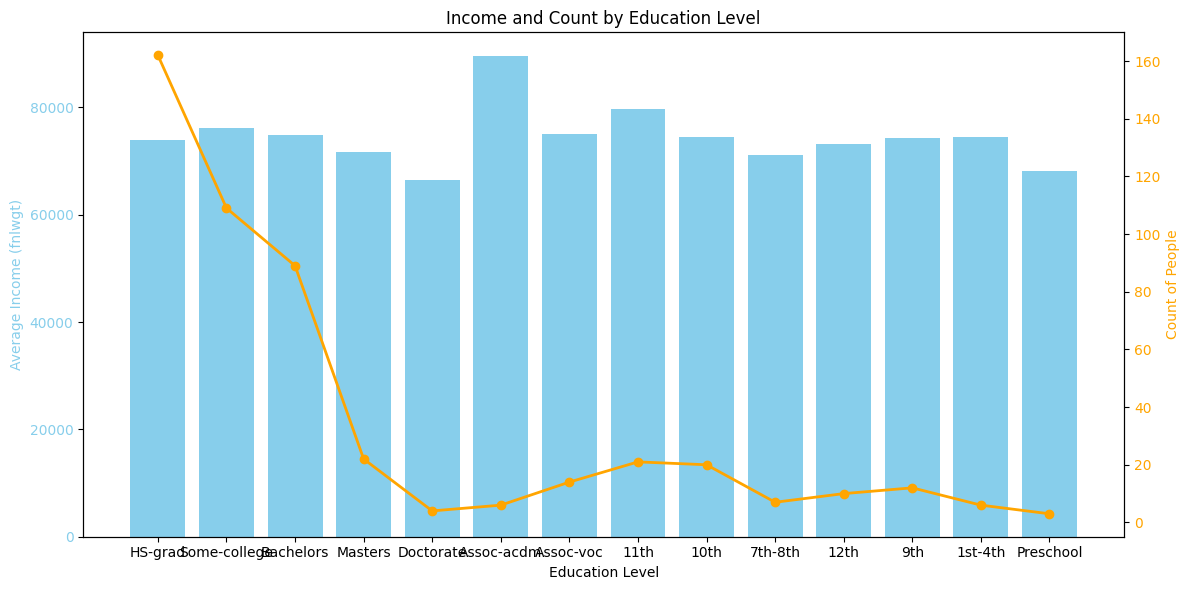

In [34]:
# Group the best earners by education and calculate the mean of 'fnlwgt'
income_per_education = best_earners.groupby('education')['fnlwgt'].mean()

# Count the number of people in each education category
count_per_education = best_earners['education'].value_counts()

# Sort the education levels by their hierarchical order (lowest to highest)
education_order = ['HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Doctorate', 'Assoc-acdm', 'Assoc-voc', '11th', '10th', '7th-8th', '12th', '9th', '1st-4th', 'Preschool']
income_per_education_sorted = income_per_education.loc[education_order]
count_per_education_sorted = count_per_education.loc[education_order]

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the average income (fnlwgt) on the primary y-axis
ax1.bar(income_per_education_sorted.index, income_per_education_sorted, color='skyblue', label='Average Income (fnlwgt)')
ax1.set_xlabel('Education Level')
ax1.set_ylabel('Average Income (fnlwgt)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Create a secondary y-axis for the count of people
ax2 = ax1.twinx()
ax2.plot(count_per_education_sorted.index, count_per_education_sorted, color='orange', marker='o', label='Count of People', linewidth=2)
ax2.set_ylabel('Count of People', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add labels and title
plt.title('Income and Count by Education Level')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


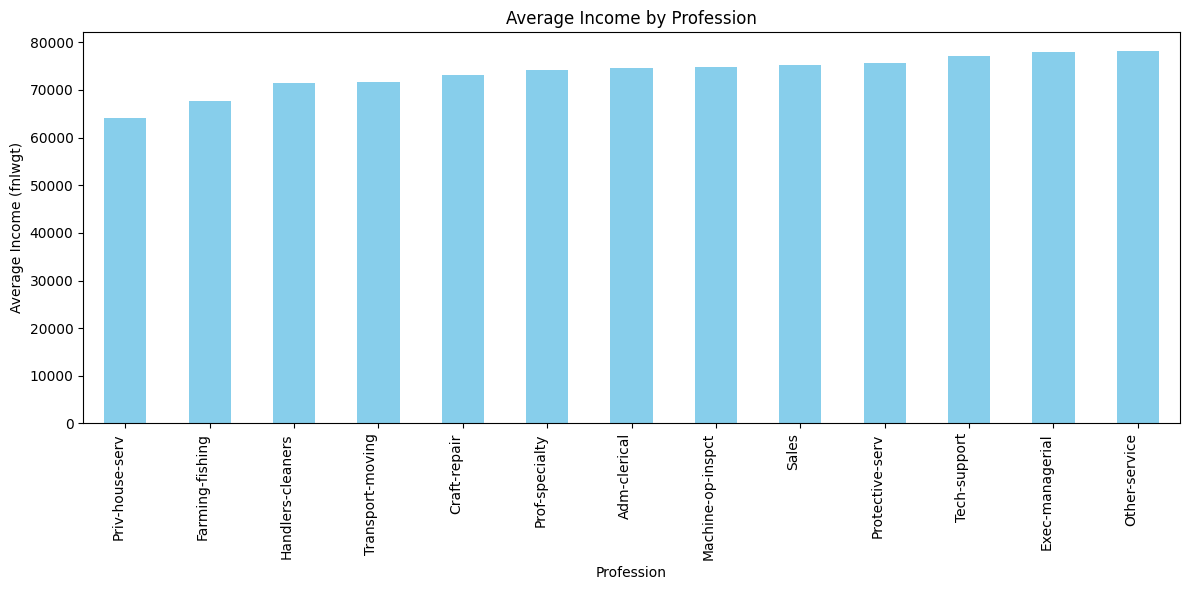

In [33]:
# Group the data by profession (occupation) and calculate the average income (fnlwgt)
income_by_profession = best_earners.groupby('occupation')['fnlwgt'].mean()

# Sort by income from lowest to highest
income_by_profession_sorted = income_by_profession.sort_values()

# Create the bar plot
plt.figure(figsize=(12, 6))
income_by_profession_sorted.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Profession')
plt.ylabel('Average Income (fnlwgt)')
plt.title('Average Income by Profession')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Show the plot
plt.tight_layout()
plt.show()
